In [3]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

In [4]:
def PCA(x, num_c = 20): 
    x_mean = np.mean(x.T, axis = 1).T
    x_std = np.std(x.T, axis = 1).T
    
    x = ((x - x_mean) / x_std).T
    
    e_values, e_vectors = np.linalg.eigh(np.dot(x, x.T))
    pc_size = np.size(e_vectors, axis = 1)
    
    idx = np.argsort(e_values)
    idx = idx[::-1]
    e_vectors = e_vectors[:,idx]
    e_values = e_values[idx]
    
    if num_c < pc_size and num_c >= 0:
        e_vectors = e_vectors[:, range(num_c)] # cut some prinicipal componenets if there are too many
        
    tmp = np.dot(e_vectors.T, x)
    new_im = (np.dot(e_vectors, tmp).T * x_std) + x_mean
    new_im = np.uint8(np.absolute(new_im)) # must be 'uint8' to read array as image
    return new_im

In [5]:
def SVD(x, r = 20):
    u, s, v = np.linalg.svd(x)
    r = min(r, len(s))
    new_im = np.matrix(u[:, :r]) * np.diag(s[:r]) * np.matrix(v[:r, :])
    return new_im

def svd(arr, pcs = 50):
    u, s, vh = np.linalg.svd(arr)
    pcs = np.min([pcs, len(s)])
    ans = np.zeros(arr.shape)
    for i in range(0, pcs):
        ans += s[i]*np.outer(u[:, i], vh.T[:, i])
    return ans

In [6]:
def plot_portraits(images, n_row, n_col, ks, sizes):
    plt.figure(figsize=(5 * n_col, 5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i])
        plt.xticks(())
        plt.title("Rank: " + str(ks[i]) + " | Size: " + str(sizes[i]) + " KB")
        plt.yticks(())

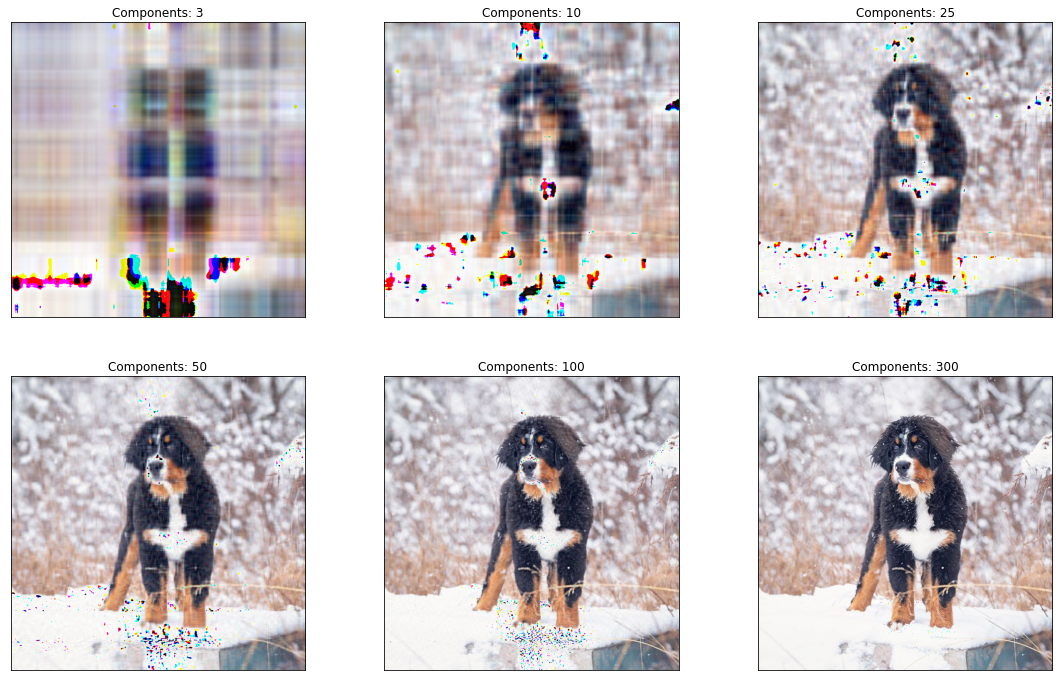

In [220]:
im = np.asarray(Image.open("rowan.png")) # image to compress

r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

ks = [3, 10, 25, 50, 100, 300]
sizes = [299, 368, 425, 476, 526, 570]
images = []

for k in ks:
    new_r = PCA(r, k)
    new_g = PCA(g, k)
    new_b = PCA(b, k)
    
    new_im_arr = np.dstack((new_r, new_g, new_b))
    new_im = Image.fromarray(new_im_arr)
    new_im.save("compressed_img_" + str(k) + ".png")
    #new_im.show()
    images.append(new_im)
    
plot_portraits(images, 2, 3, ks)

(600, 600, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)


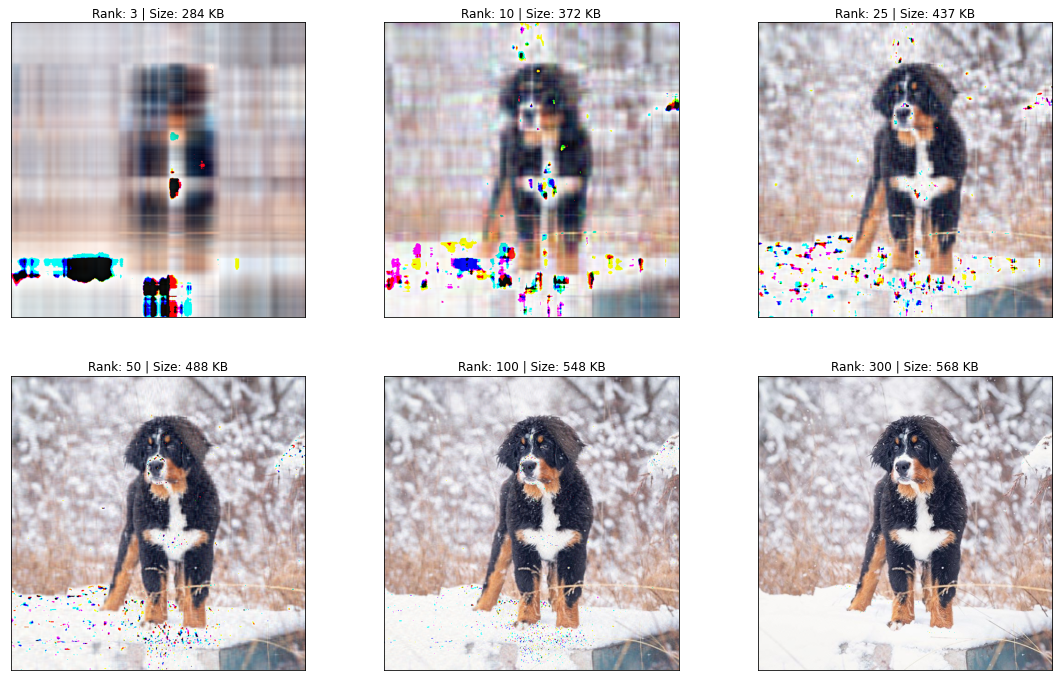

In [9]:
im = np.asarray(Image.open("rowan.png"))
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

ks = [3, 10, 25, 50, 100, 300]
sizes = [284, 372, 437, 488, 548, 568]
images = []

for k in ks:
    new_r = svd(r, k)
    new_g = svd(g, k)
    new_b = svd(b, k)
    
    new_im_arr = np.dstack((new_r, new_g, new_b))
    new_im = Image.fromarray(new_im_arr.astype(np.uint8))
    new_im.save("svd_" + str(k) + ".png")
    images.append(new_im)
    
plot_portraits(images, 2, 3, ks, sizes)

In [2]:
ks = [300, 425, 500]
sizes = [565, 566, 568]
images = []

for k in ks:
    new_r = PCA(r, k)
    new_g = PCA(g, k)
    new_b = PCA(b, k)
    
    new_im_arr = np.dstack((new_r, new_g, new_b))
    new_im = Image.fromarray(new_im_arr)
    new_im.save("compressed_img_" + str(k) + ".png")
    #new_im.show()
    images.append(new_im)
    
plot_portraits(images, 1, 3, ks)

NameError: name 'PCA' is not defined

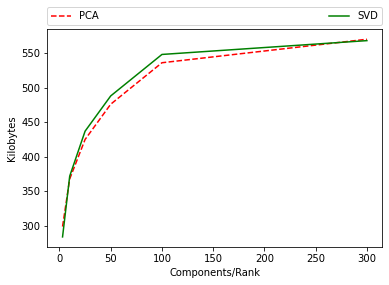

In [258]:
pc_by_size = [(3, 299), (10, 368), (25, 425), (50, 476), (100, 536), (300, 570)]
svd_by_size = [(3, 284), (10, 372), (25, 437), (50, 488), (100, 548), (300, 568)]

x, y = zip(*pc_by_size)

w, z = zip(*svd_by_size)



plt.ylabel("Kilobytes")
plt.xlabel("Components/Rank")
plt.plot(x, y, 'r--', label = "PCA")
plt.plot(w, z, 'g', label = "SVD")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [11]:
x = np.array([[1, 1, 2], [3, 3, 2], [3, 5, 1]])
new_x = PCA(x, 2)
print(new_x)

[[0 1 2]
 [3 2 1]
 [3 5 1]]
